In [112]:
import pandas as pd
import numpy as np

In [114]:
HAI_df1 = pd.read_csv("Healthcare Associated Infections - Hospital_2020.csv") 
HAI_df2 =pd.read_csv("Healthcare_Associated_Infections-Hospital2021.csv")
HAI_df3 =pd.read_csv("Healthcare_Associated_Infections-Hospital2022.csv")
HAI_df4 =pd.read_csv("Healthcare_Associated_Infections-Hospital2023.csv")
HAI_df5 =pd.read_csv("Healthcare_Associated_Infections-Hospital2024.csv")

HAI_df = pd.concat([HAI_df1, HAI_df2, HAI_df3, HAI_df4, HAI_df5], ignore_index=True)

In [115]:
HAI_df.head()

,Facility ID,Facility Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure ID,Measure Name,Compared to National,Score,Footnote,Start Date,End Date,City/Town,County/Parish,Telephone Number
0,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,HAI_1_CILOWER,Central Line Associated Bloodstream Infection ...,No Different than National Benchmark,0.522,NaN,07/01/2018,06/30/2019,NaN,NaN,NaN
1,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,HAI_1_CIUPPER,Central Line Associated Bloodstream Infection ...,No Different than National Benchmark,2.133,NaN,07/01/2018,06/30/2019,NaN,NaN,NaN
2,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,HAI_1_DOPC,Central Line Associated Bloodstream Infection:...,No Different than National Benchmark,6874,NaN,07/01/2018,06/30/2019,NaN,NaN,NaN
3,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,HAI_1_ELIGCASES,Central Line Associated Bloodstream Infection ...,No Different than National Benchmark,7.122,NaN,07/01/2018,06/30/2019,NaN,NaN,NaN
4,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,HAI_1_NUMERATOR,Central Line Associated Bloodstream Infection ...,No Different than National Benchmark,8,NaN,07/01/2018,06/30/2019,NaN,NaN,NaN


In [55]:

HAI_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867168 entries, 0 to 867167
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Facility ID           867168 non-null  object
 1   Facility Name         867168 non-null  object
 2   Address               867168 non-null  object
 3   City                  520524 non-null  object
 4   State                 867168 non-null  object
 5   ZIP Code              867168 non-null  int64 
 6   County Name           520524 non-null  object
 7   Phone Number          520524 non-null  object
 8   Measure ID            867168 non-null  object
 9   Measure Name          867168 non-null  object
 10  Compared to National  867168 non-null  object
 11  Score                 867168 non-null  object
 12  Footnote              393296 non-null  object
 13  Start Date            867168 non-null  object
 14  End Date              867168 non-null  object
 15  City/Town        

In [118]:
# Convert 'Facility ID' to numeric (invalid entries become NaN)
HAI_df['Facility ID'] = pd.to_numeric(HAI_df['Facility ID'], errors='coerce').astype('Int64')


# Convert 'Score' to numeric (e.g., float), handling bad values
HAI_df['Score'] = pd.to_numeric(HAI_df['Score'], errors='coerce')

  

In [119]:
# Hospital list for filtering
hospital_ids = [230017, 230020, 230038, 230058, 230081, 230097, 230110, 230156,
                230222, 231320, 233300, 230059, 231322]

# Target measures for filtering
target_measures = ["Central Line Associated Bloodstream Infection (ICU + select Wards)",
                   "Catheter Associated Urinary Tract Infections (ICU + select Wards)",
                  "SSI - Colon Surgery", 
                   "MRSA Bacteremia", "Clostridium Difficile (C.Diff)"]




In [122]:
def prepare_Hospital_Associated_Infection_data(HAI_df, hospital_ids, target_measures):
    keep = ['Facility ID', 'Facility Name', 'Measure ID', 'Measure Name',
            'Compared to National', 'Score', 'End Date']



In [124]:
print(HAI_df["Compared to National"].unique())

['No Different than National Benchmark'
 'Better than the National Benchmark' 'Not Available'
 'Worse than the National Benchmark']


### Calculating the HAI score by each Category

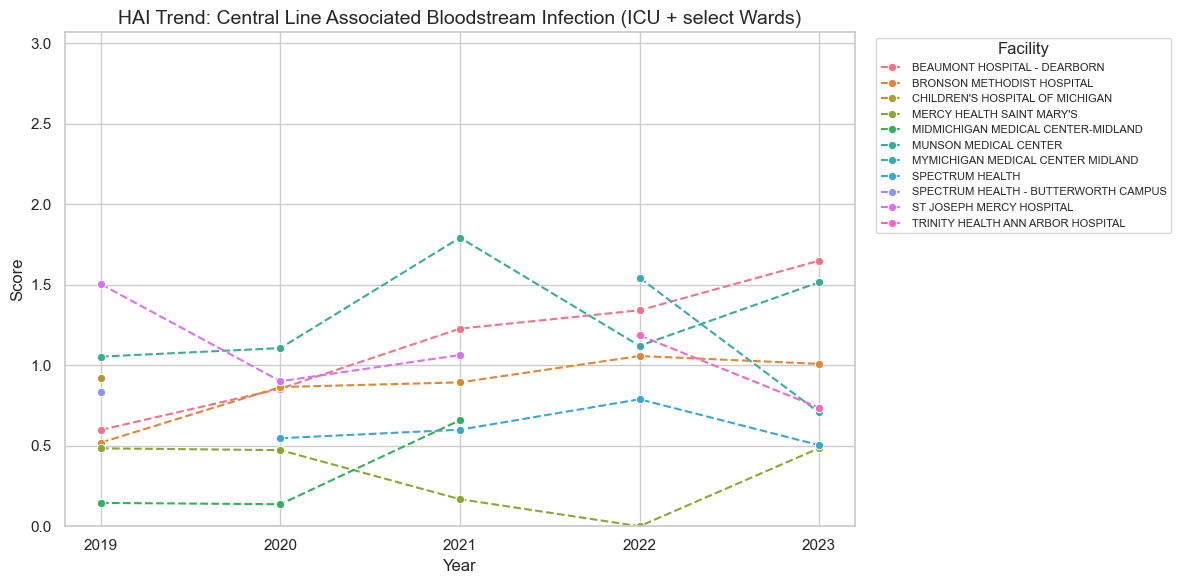

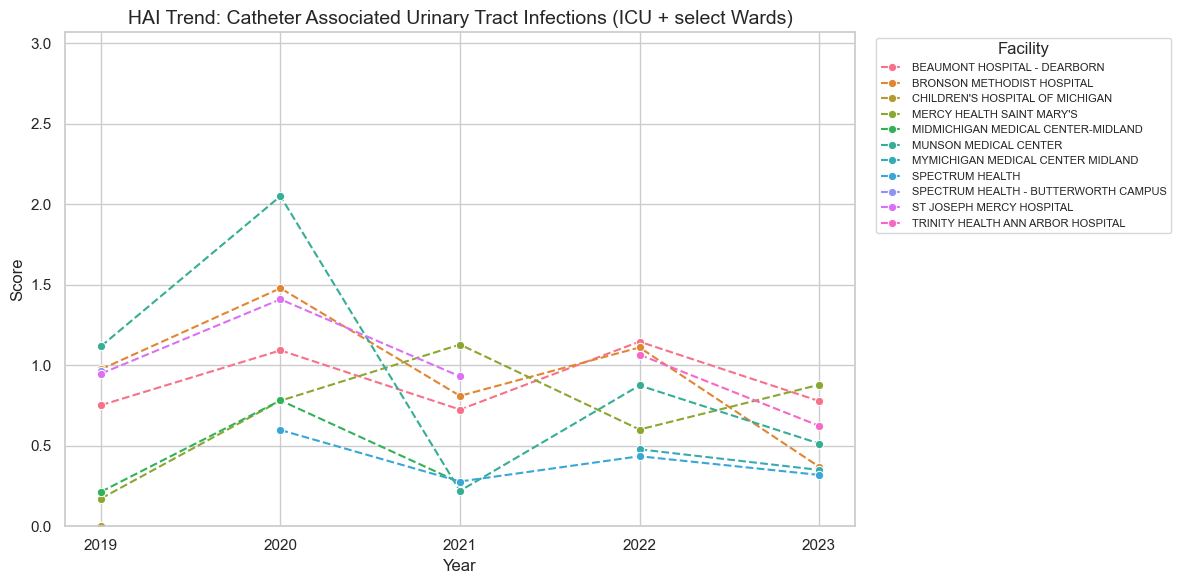

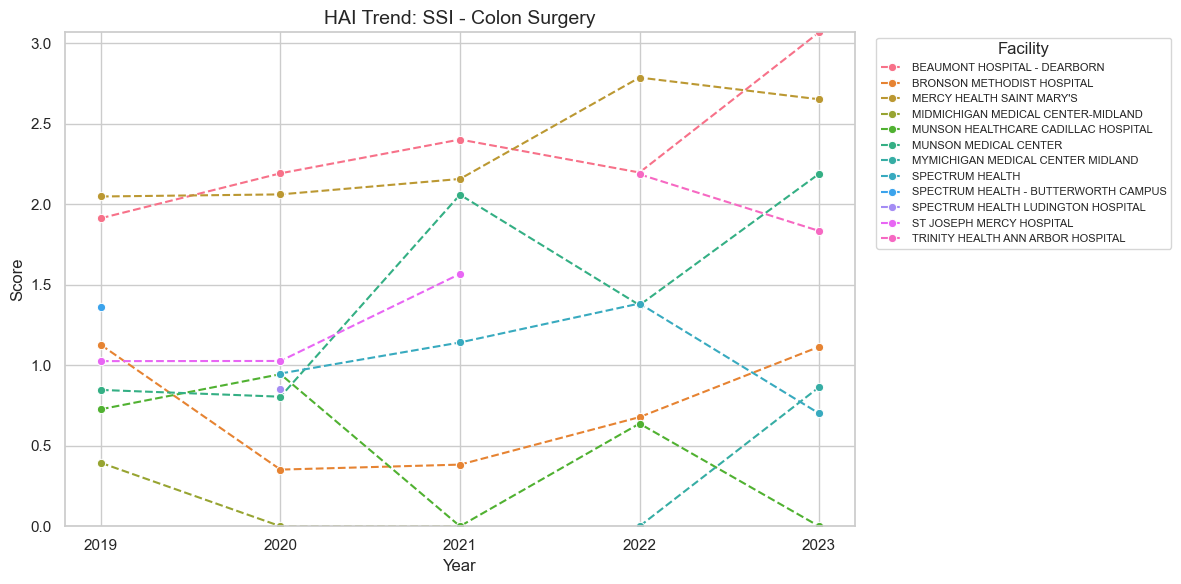

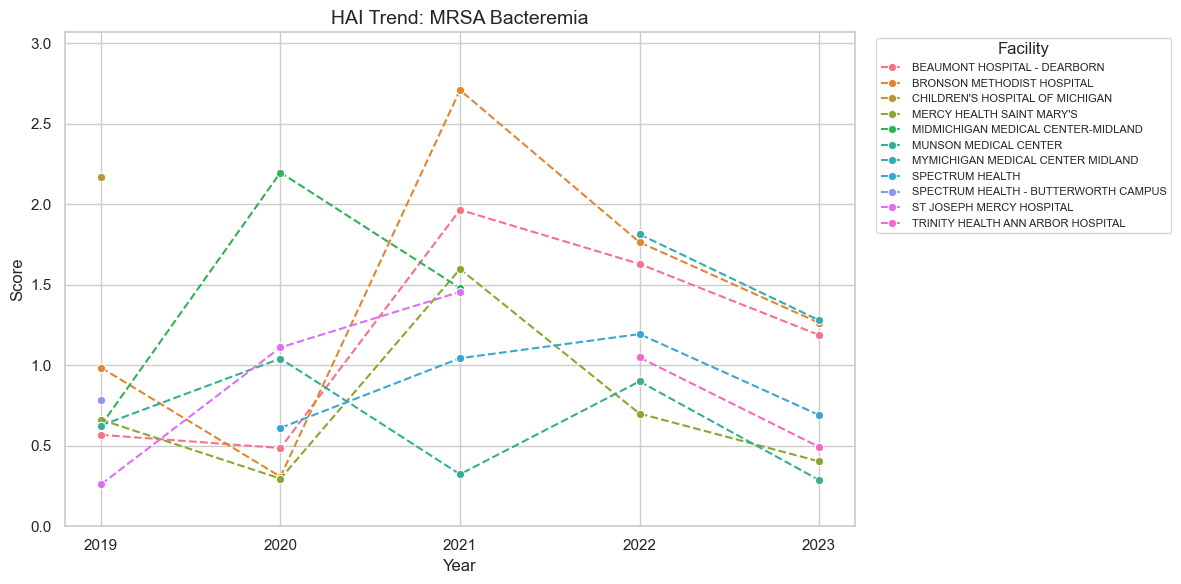

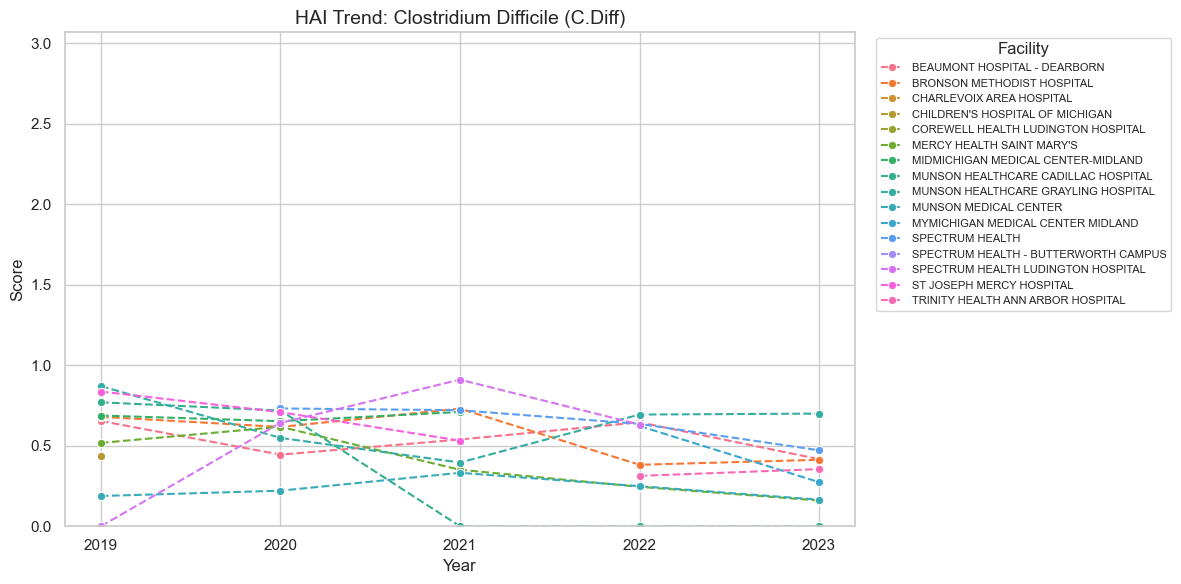

In [126]:
### Calculating the HAI score by each Category
# Filter data
HAI_df = HAI_df[
    HAI_df['Facility ID'].isin(hospital_ids) &
    HAI_df['Measure Name'].isin(target_measures)
].copy()

# Extract year and clean
HAI_df['Year'] = pd.to_datetime(HAI_df['End Date'], errors='coerce').dt.year
HAI_df = HAI_df.dropna(subset=['Score', 'Year'])

# Plotting settings
sns.set(style="whitegrid")
global_ymin = 0
global_ymax = max(2.0, HAI_df["Score"].max())  # Use at least 2.0 to allow space

# Plot each HAI measure
for measure in HAI_df['Measure Name'].unique():
    plt.figure(figsize=(12, 6))
    data = HAI_df[HAI_df['Measure Name'] == measure].sort_values(['Facility Name', 'Year'])

    # Plot: one line per hospital
    sns.lineplot(
        data=data,
        x="Year",
        y="Score",
        hue="Facility Name",
        marker="o",
        linestyle='--',
        linewidth=1.5
    )

    # Styling
    plt.title(f"HAI Trend: {measure}", fontsize=14)
    plt.ylabel("Score")
    plt.xlabel("Year")
    plt.xticks(sorted(data["Year"].unique()))
    plt.ylim(global_ymin, global_ymax)
    plt.legend(title="Facility", bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=8)
    plt.tight_layout()
    plt.savefig(f"{measure[:30].replace(' ', '_')}_HAI_Trend.png", dpi=300, bbox_inches='tight')
    plt.show()


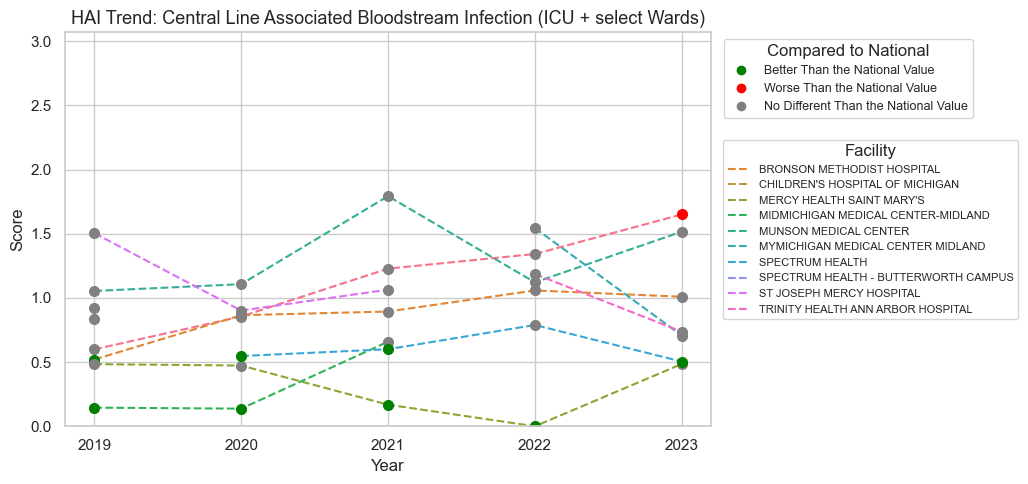

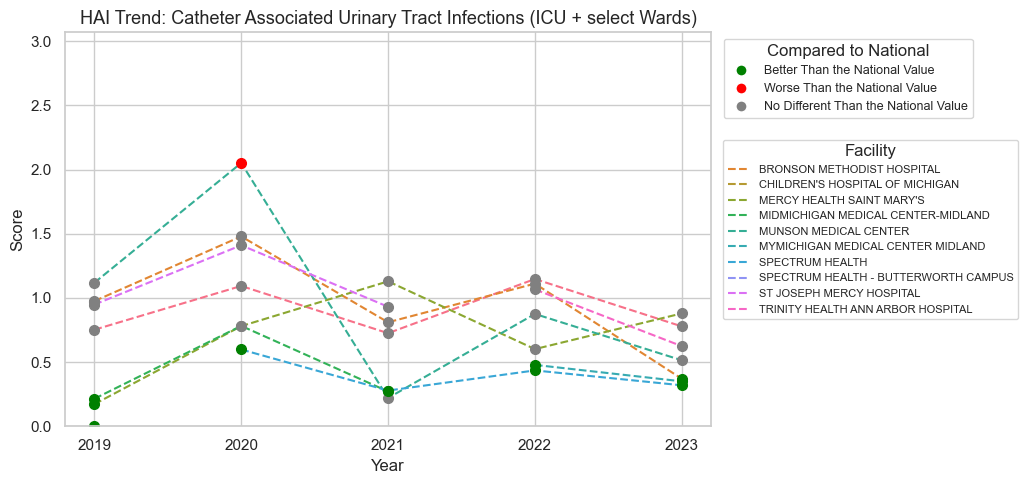

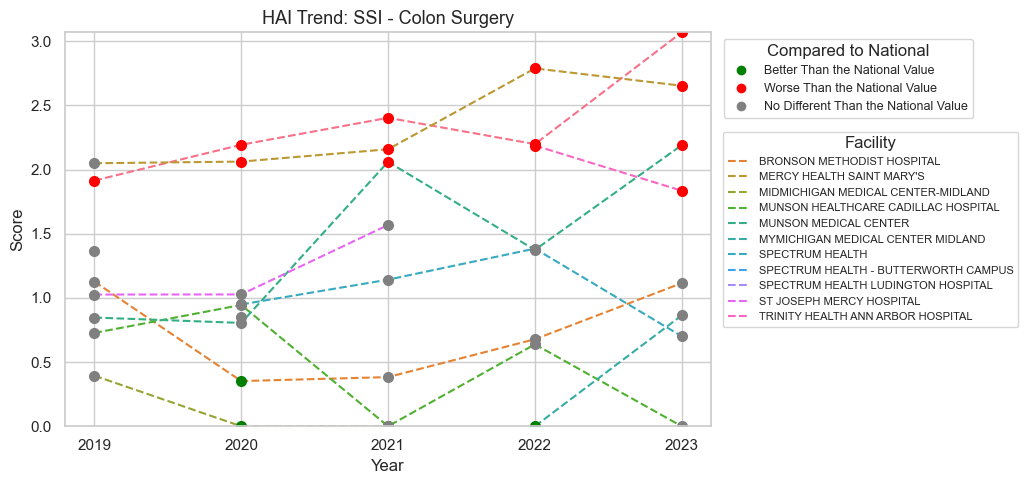

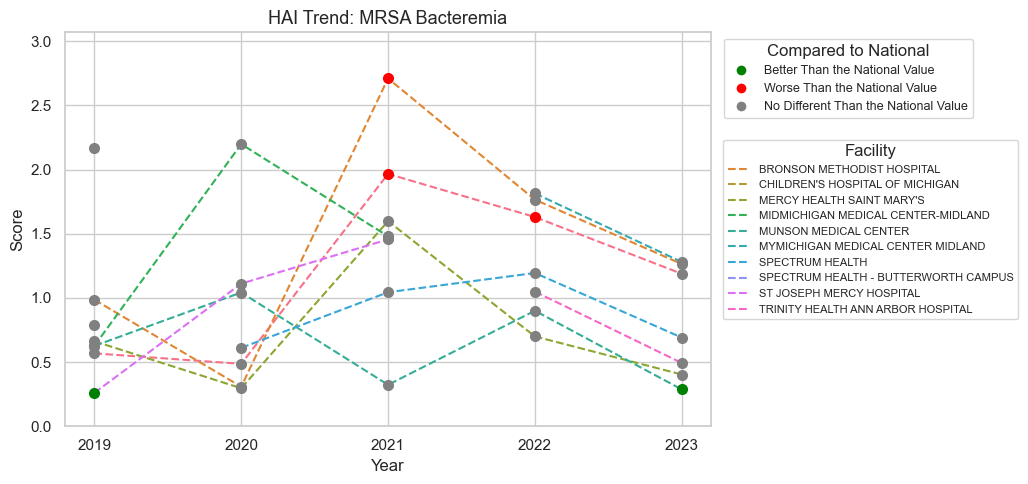

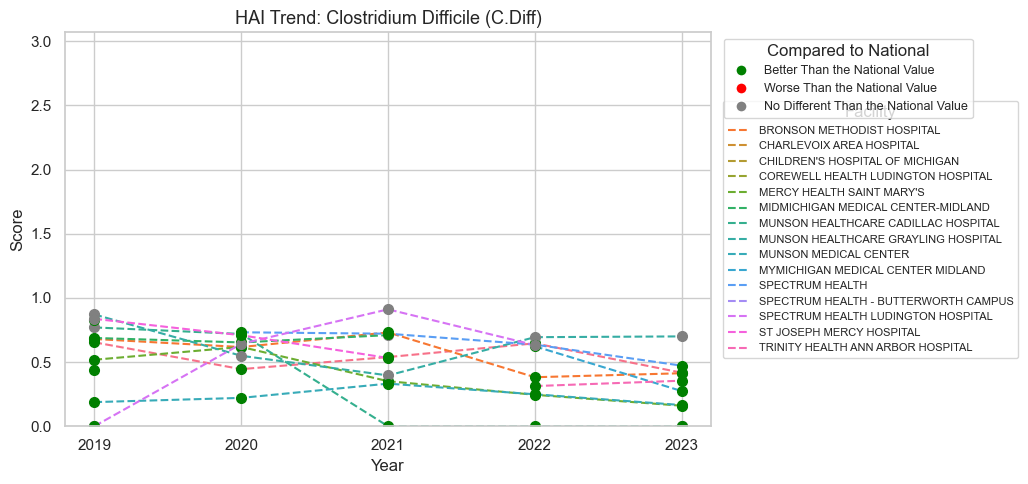

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
import numpy as np

# Load and combine CSVs
dfs = [
    pd.read_csv("Healthcare Associated Infections - Hospital_2020.csv"), 
    pd.read_csv("Healthcare_Associated_Infections-Hospital2021.csv"),
    pd.read_csv("Healthcare_Associated_Infections-Hospital2022.csv"),
    pd.read_csv("Healthcare_Associated_Infections-Hospital2023.csv"),
    pd.read_csv("Healthcare_Associated_Infections-Hospital2024.csv")
]
HAI_df = pd.concat(dfs, ignore_index=True)

# Coerce types
HAI_df['Facility ID'] = pd.to_numeric(HAI_df['Facility ID'], errors='coerce').astype('Int64')
HAI_df['Score'] = pd.to_numeric(HAI_df['Score'], errors='coerce')

# Updated standardization map
standardize_map = {
    'Better than the National Benchmark': 'Better Than the National Value',
    'Worse than the National Benchmark': 'Worse Than the National Value',
    'No Different than National Benchmark': 'No Different Than the National Value',
    'Better Than the National Rate': 'Better Than the National Value',
    'Worse Than the National Rate': 'Worse Than the National Value',
    'No Different Than the National Rate': 'No Different Than the National Value',
    'Better Than the National Value': 'Better Than the National Value',
    'Worse Than the National Value': 'Worse Than the National Value',
    'No Different Than the National Value': 'No Different Than the National Value',
    'Number of Cases Too Small': np.nan,
    'Not Available': np.nan
}
HAI_df['Compared to National'] = HAI_df['Compared to National'].replace(standardize_map)

# Filter targets
hospital_ids = [230017, 230020, 230038, 230058, 230081, 230097, 230110, 230156,
                230222, 231320, 233300, 230059, 231322]

target_measures = [
    "Central Line Associated Bloodstream Infection (ICU + select Wards)",
    "Catheter Associated Urinary Tract Infections (ICU + select Wards)",
    "SSI - Colon Surgery",
    "MRSA Bacteremia",
    "Clostridium Difficile (C.Diff)"
]

HAI_df = HAI_df[
    HAI_df['Facility ID'].isin(hospital_ids) &
    HAI_df['Measure Name'].isin(target_measures)
].copy()

HAI_df['Year'] = pd.to_datetime(HAI_df['End Date'], errors='coerce').dt.year
HAI_df = HAI_df.dropna(subset=['Score', 'Year'])

# Color map for national comparison
comparison_palette = {
    "Better Than the National Value": "green",
    "Worse Than the National Value": "red",
    "No Different Than the National Value": "gray"
}

sns.set(style="whitegrid")
global_ymin = 0
global_ymax = max(2.0, HAI_df["Score"].max())

# Plotting
for measure in HAI_df['Measure Name'].unique():
    plt.figure(figsize=(10, 5))  # Smaller figure size

    data = HAI_df[HAI_df['Measure Name'] == measure].sort_values(['Facility Name', 'Year'])

    # Plot line per hospital
    lineplot = sns.lineplot(
        data=data,
        x="Year",
        y="Score",
        hue="Facility Name",
        marker=None,
        linestyle='--',
        linewidth=1.5
    )

    # Overlay comparison color-coded markers
    for _, row in data.iterrows():
        comp = row["Compared to National"]
        if pd.notna(comp) and comp in comparison_palette:
            plt.plot(
                row["Year"],
                row["Score"],
                marker='o',
                color=comparison_palette[comp],
                markersize=7,
                linestyle='None'
            )

    # Title & axis
    plt.title(f"HAI Trend: {measure}", fontsize=13)
    plt.ylabel("Score")
    plt.xlabel("Year")
    plt.xticks(sorted(data["Year"].unique()))
    plt.ylim(global_ymin, global_ymax)

    # Handle legends
    # 1. Line legend (hospitals)
    handles1, labels1 = lineplot.get_legend_handles_labels()
    hospital_legend = plt.legend(handles=handles1[1:], labels=labels1[1:],  # skip "hue" label
                                 title="Facility", loc='center left', bbox_to_anchor=(1.01, 0.5), fontsize=8)

    # 2. Comparison legend (markers)
    comparison_handles = [
        Line2D([0], [0], marker='o', color='w', label=label,
               markerfacecolor=color, markersize=8)
        for label, color in comparison_palette.items()
    ]
    plt.legend(handles=comparison_handles, title="Compared to National",
               loc='upper left', bbox_to_anchor=(1.01, 1), fontsize=9)

    plt.gca().add_artist(hospital_legend)  # add the hospital legend back manually

    # Final layout & save
    plt.tight_layout()
    plt.savefig(f"{measure[:30].replace(' ', '_')}_HAI_Trend.png", dpi=300, bbox_inches='tight')
    plt.show()


### Comapring the HAI trend by each hospital color coded with national benchmark 

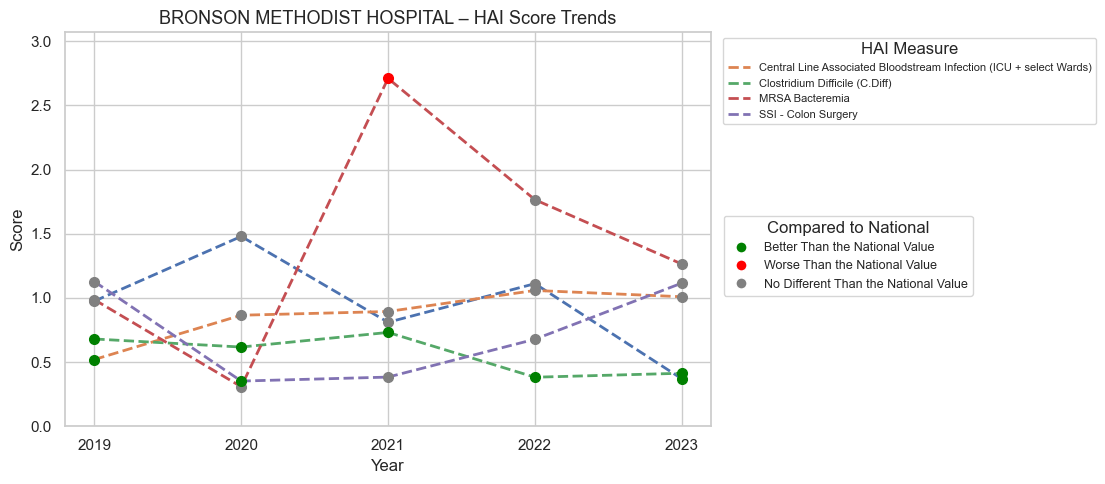

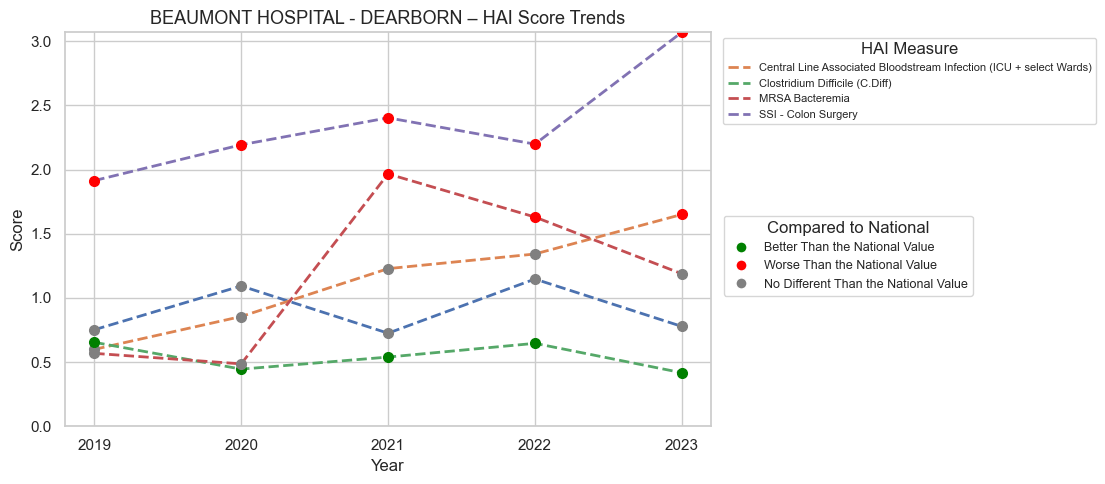

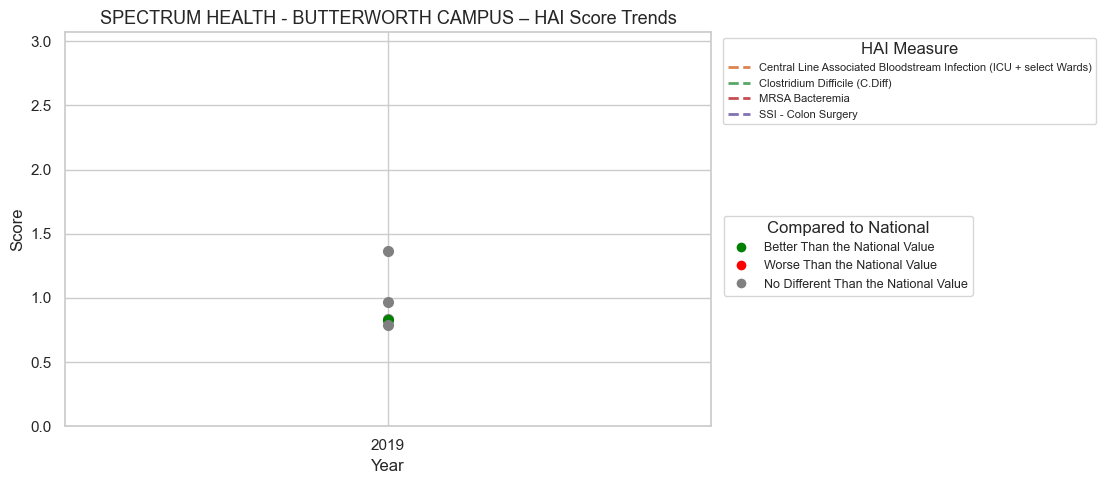

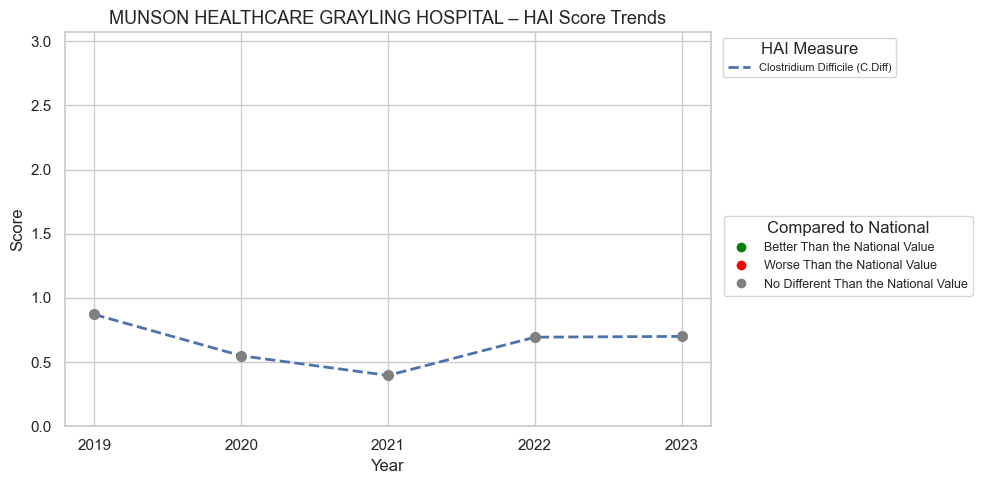

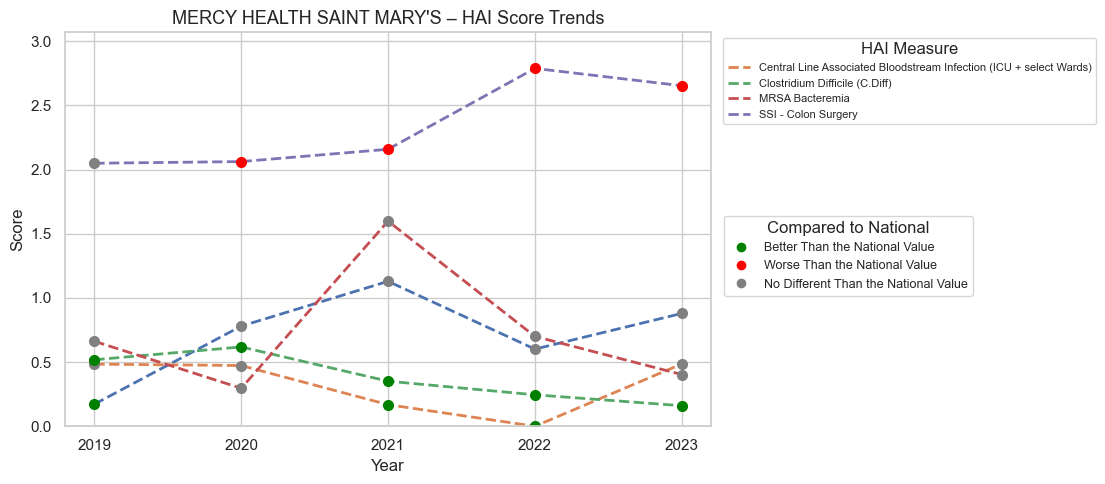

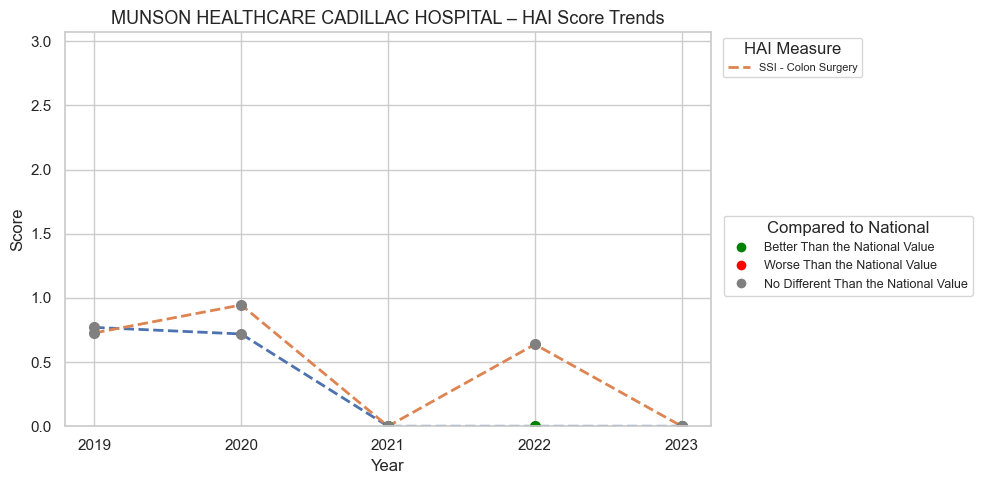

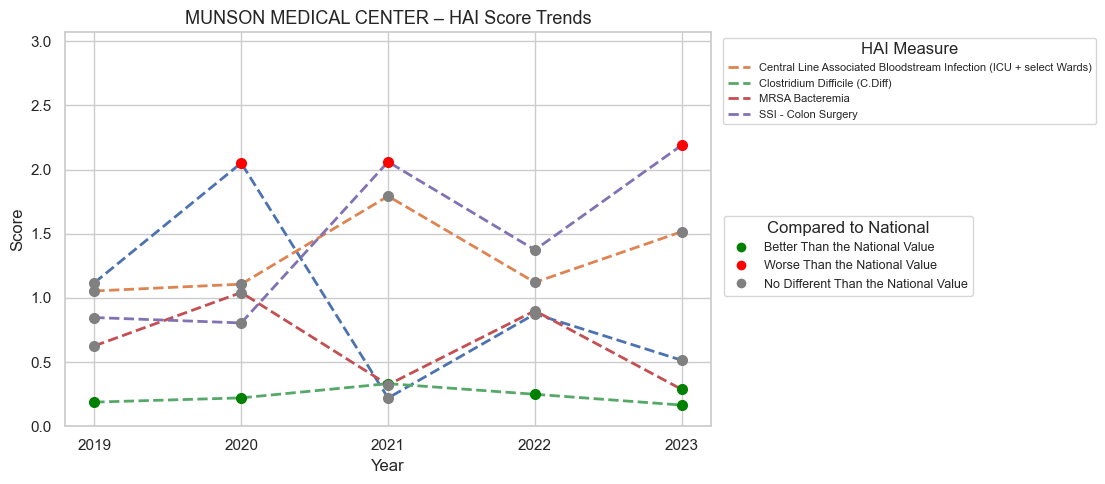

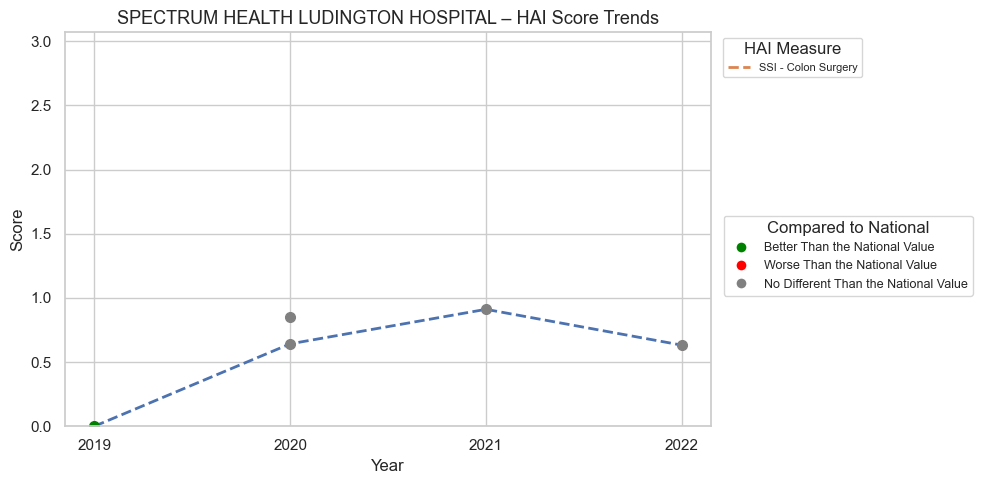

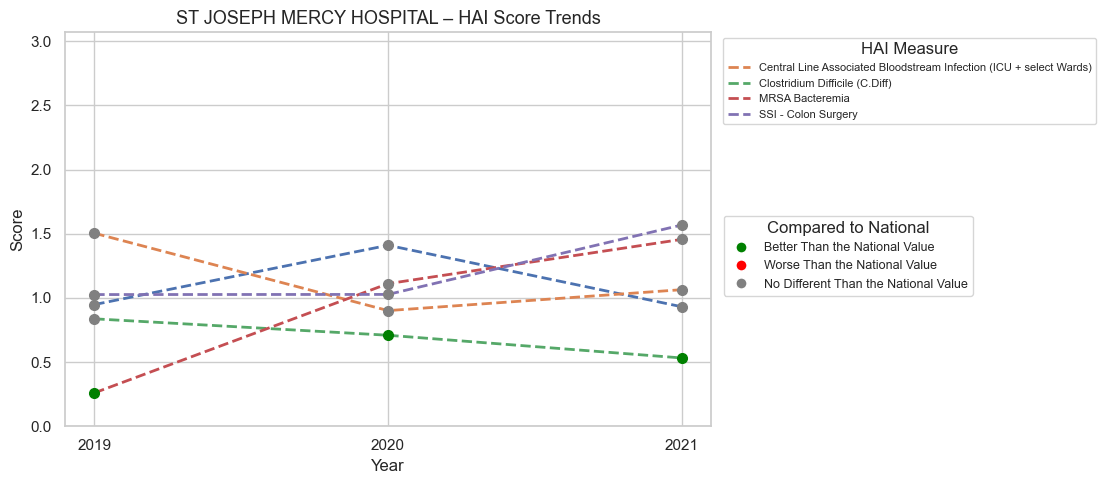

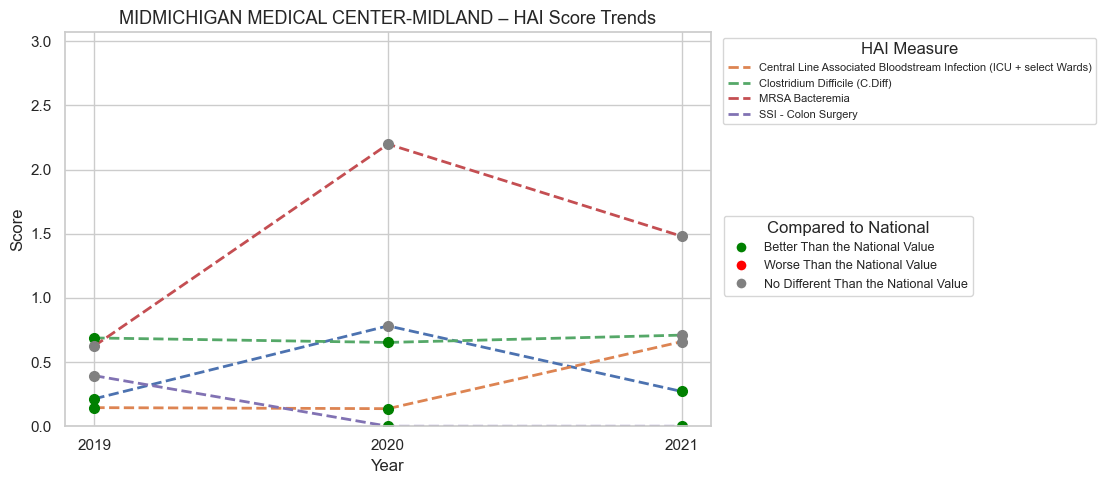

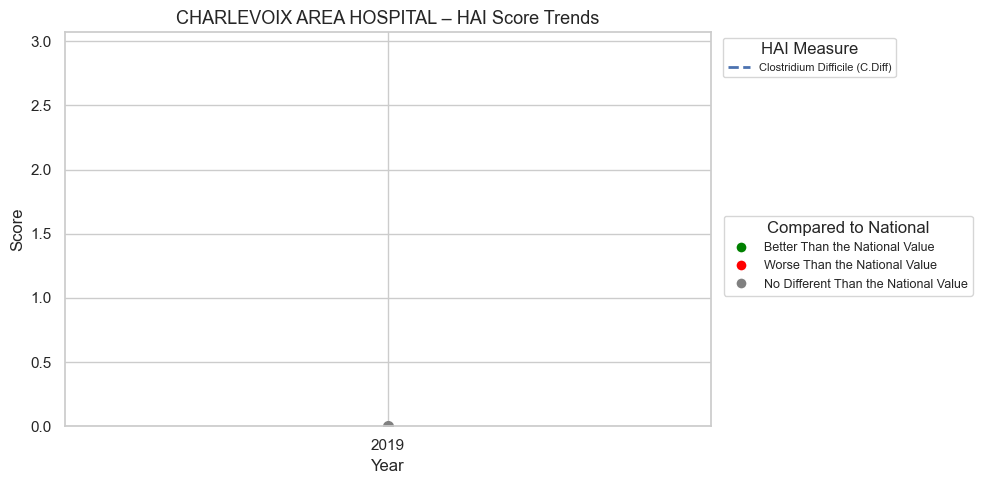

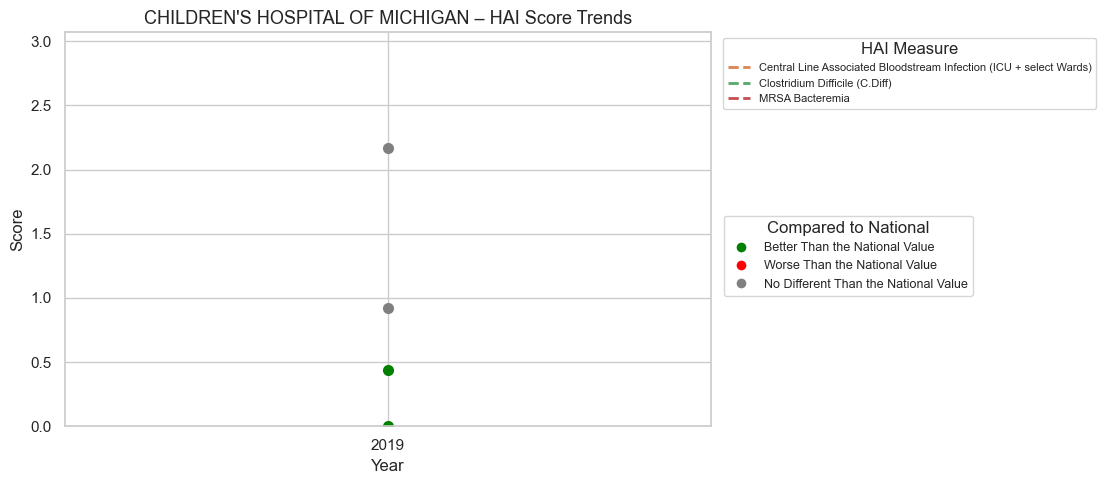

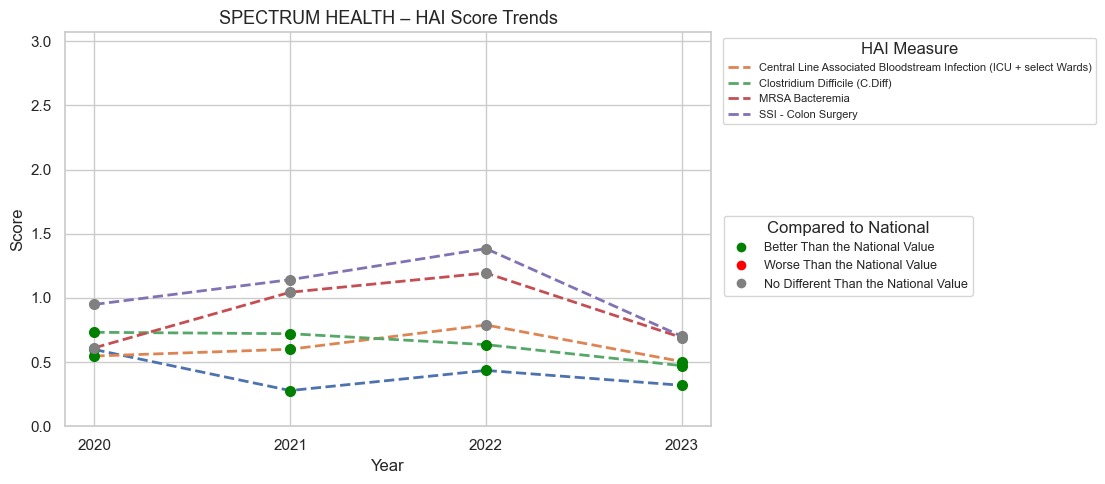

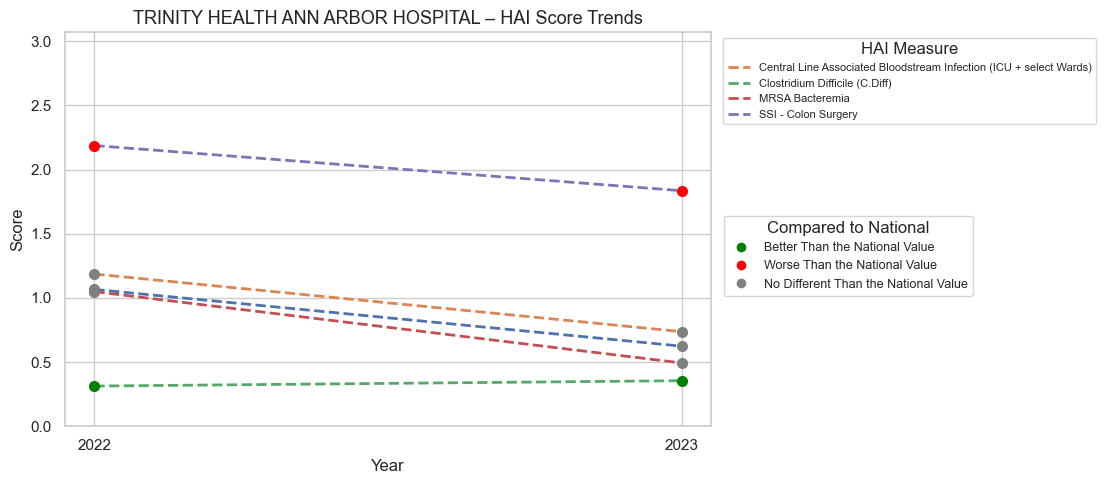

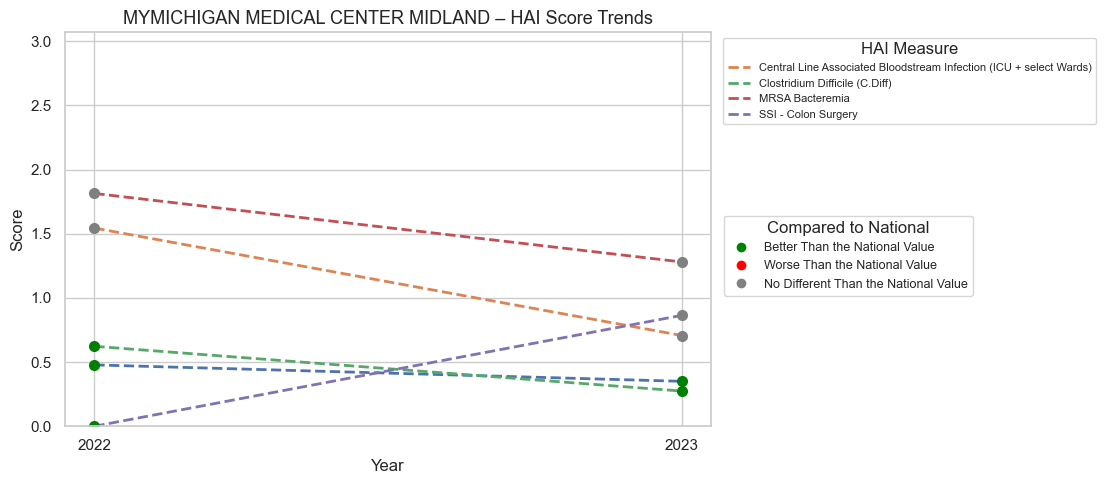

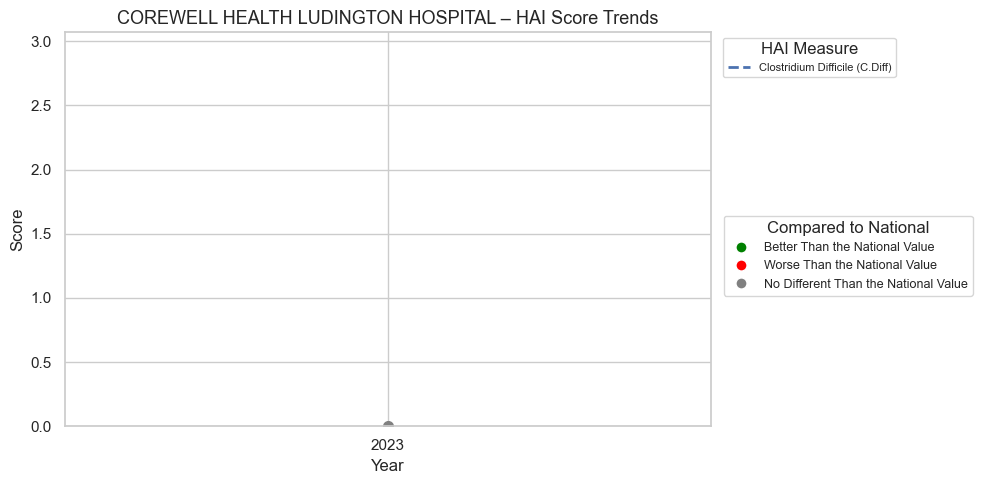

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
import numpy as np

# Load and combine
dfs = [
    pd.read_csv("Healthcare Associated Infections - Hospital_2020.csv"), 
    pd.read_csv("Healthcare_Associated_Infections-Hospital2021.csv"),
    pd.read_csv("Healthcare_Associated_Infections-Hospital2022.csv"),
    pd.read_csv("Healthcare_Associated_Infections-Hospital2023.csv"),
    pd.read_csv("Healthcare_Associated_Infections-Hospital2024.csv")
]
HAI_df = pd.concat(dfs, ignore_index=True)

# Type conversion
HAI_df['Facility ID'] = pd.to_numeric(HAI_df['Facility ID'], errors='coerce').astype('Int64')
HAI_df['Score'] = pd.to_numeric(HAI_df['Score'], errors='coerce')

# Standardize comparison labels
standardize_map = {
    'Better than the National Benchmark': 'Better Than the National Value',
    'Worse than the National Benchmark': 'Worse Than the National Value',
    'No Different than National Benchmark': 'No Different Than the National Value',
    'Number of Cases Too Small': np.nan,
    'Not Available': np.nan
}
HAI_df['Compared to National'] = HAI_df['Compared to National'].replace(standardize_map)

# Filters
hospital_ids = [230017, 230020, 230038, 230058, 230081, 230097, 230110, 230156,
                230222, 231320, 233300, 230059, 231322]

target_measures = [
    "Central Line Associated Bloodstream Infection (ICU + select Wards)",
    "Catheter Associated Urinary Tract Infections (ICU + select Wards)",
    "SSI - Colon Surgery",
    "MRSA Bacteremia",
    "Clostridium Difficile (C.Diff)"
]

HAI_df = HAI_df[
    HAI_df['Facility ID'].isin(hospital_ids) &
    HAI_df['Measure Name'].isin(target_measures)
].copy()

# Process date
HAI_df['Year'] = pd.to_datetime(HAI_df['End Date'], errors='coerce').dt.year
HAI_df = HAI_df.dropna(subset=['Score', 'Year'])

# Marker color map
comparison_palette = {
    "Better Than the National Value": "green",
    "Worse Than the National Value": "red",
    "No Different Than the National Value": "gray"
}

sns.set(style="whitegrid")
global_ymin = 0
global_ymax = max(2.0, HAI_df["Score"].max())

# Plot one chart per hospital
for facility in HAI_df['Facility Name'].unique():
    plt.figure(figsize=(10, 5))
    data = HAI_df[HAI_df['Facility Name'] == facility].sort_values(['Measure Name', 'Year'])

    # Plot: one line per HAI measure
    lineplot = sns.lineplot(
        data=data,
        x="Year",
        y="Score",
        hue="Measure Name",
        marker=None,
        linewidth=2,
        linestyle='--'
    )

    # Colored markers based on Compared to National
    for _, row in data.iterrows():
        comp = row["Compared to National"]
        if pd.notna(comp) and comp in comparison_palette:
            plt.plot(
                row["Year"],
                row["Score"],
                marker='o',
                color=comparison_palette[comp],
                markersize=7,
                linestyle='None'
            )

    # Title and axis
    plt.title(f"{facility} – HAI Score Trends", fontsize=13)
    plt.ylabel("Score")
    plt.xlabel("Year")
    plt.xticks(sorted(data["Year"].unique()))
    plt.ylim(global_ymin, global_ymax)

    # HAI Measure legend
    handles1, labels1 = lineplot.get_legend_handles_labels()
    hai_legend = plt.legend(handles=handles1[1:], labels=labels1[1:],  # skip "hue"
                            title="HAI Measure", bbox_to_anchor=(1.01, 1), loc='upper left', fontsize=8)

    # Compared to National legend
    comp_handles = [
        Line2D([0], [0], marker='o', color='w', label=label,
               markerfacecolor=color, markersize=8)
        for label, color in comparison_palette.items()
    ]
    plt.legend(handles=comp_handles, title="Compared to National",
               bbox_to_anchor=(1.01, 0.55), loc='upper left', fontsize=9)

    plt.gca().add_artist(hai_legend)

    plt.tight_layout()
    safe_name = facility.replace(" ", "_").replace("/", "_")
    plt.savefig(f"{safe_name}_HAI_Score_Trend.png", dpi=300, bbox_inches='tight')
    plt.show()
